# Comparación de algoritmos de clasificación

Este es el último notebook correspondiente a la parte de la materia en la que vemos algoritmos de clasificación.

Por lo tanto, vamos a escribir un código que nos permita visualizar las fronteras de decisión de los clasificadores que vimos en un dataset de juguete.

Este notebook puede ser útil para visualizar qué es lo que hace funcionar a cada clasificador, y discutir y entender cuales pueden ser sus posibles limitaciones.

El código está parcialmente basado en la documentación de scikit-learn (ver https://tinyurl.com/u5cemh5e)

Empezamos por importar muchas librerías que vamos a terminar usando:

In [ ]:
# librerías básicas 
import numpy as np
import matplotlib.pyplot as plt
# para crear un colormap basado en colores
from matplotlib.colors import ListedColormap
# selección de modelos
from sklearn.model_selection import train_test_split
# normalización de datos
from sklearn.preprocessing import StandardScaler
# funciones para construir datasets sintéticos
from sklearn.datasets import make_moons, make_circles, make_classification
# clasificador: red neuronal (perceptron multicapa, 100 capas por defecto, activación por ReLu)
from sklearn.neural_network import MLPClassifier
# clasificador: KNN
from sklearn.neighbors import KNeighborsClassifier
# clasificador: support vector classifier
from sklearn.svm import SVC
# clasificador: árbol de decisión
from sklearn.tree import DecisionTreeClassifier
# clasificador: ensemble de árboles (random forest)
from sklearn.ensemble import RandomForestClassifier

Ponemos los nombres de todos los clasificadores y los objetos que inicializan a los clasificadores en listas.

Más adelante, podemos jugar con estos parámetros para ver qué pasa con los clasificadores.

In [ ]:
names = ["KNN", "SVM lineal", "SVM RBF", "Árbol de decisión", "Random Forest", "Red neuronal"]

classifiers = [
    KNeighborsClassifier(7),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    ]

Ahora, vamos a generar datasets sintéticos.

Primero, empezamos por un problema linealmente separable de dos variables al que le agregamos ruido.



(100, 2)


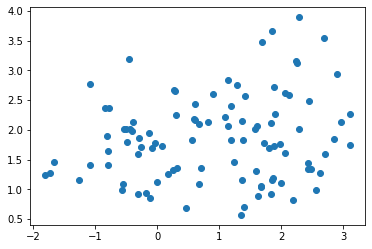

In [ ]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
print(X.shape)



rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
plt.scatter(X[:,0], X[:,1])


Después, usamos otras dos funciones predefinidas para armar datasets con ciertas propiedades geométricas y los ponemos en una lista.

In [ ]:
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

Ahora, tenemos dos loops. El primer loop es para el dataset: recorremos los tres datasets sintéticos que creamos. 

Para cada elección de un dataset, evaluamos cada uno de los clasificadores, y obtenemos su predicción sobre los valores de una grilla. 

Finalmente, hacemos un plot de los datos de entrenamiento, y de los resultados, indicando con colores la probabilidad de clasificación en cada clase dependiendo de su posición en la grilla.

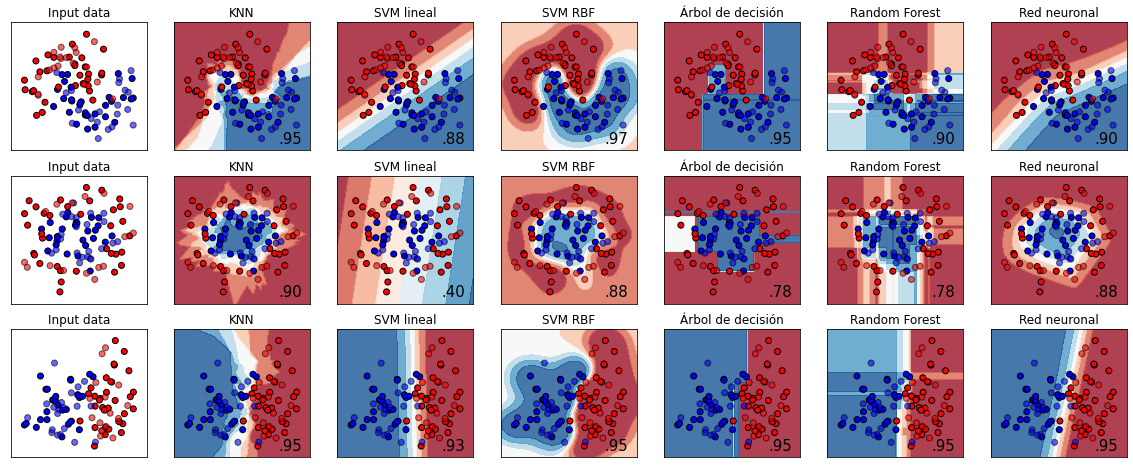

In [ ]:
figure = plt.figure(figsize=(20, 8)) # armamos la figura

h = 0.02 # el paso de la grilla

for n in np.arange(len(datasets)): # itero n=0,1, 2 

    X, y = datasets[n] # extraigo el dataset correspondiente
    X = StandardScaler().fit_transform(X) # lo escaleo
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42) # divido train test
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 # defino el rango de ejes x
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 # defino el rango de ejes y
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h)) # construyo una mella de puntos en ese rango
    
    cm = plt.cm.RdBu # esto seleccion el tipo de color map (rojo-azul)
    cm_bright = ListedColormap(['#FF0000', '#0000FF']) # construye el colormap entre esos dos colores
    ax = plt.subplot(len(datasets), len(classifiers) + 1, 1+n*(len(classifiers)+1)) # ubica al comienzo de cada fila los scatter plot de los datos de entrenamiento
    
    ax.set_title("Input data") # titulo del subplot
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k') # plotea datos de entrenamiento
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                  edgecolors='k') # plotea datos de evaluacion
    ax.set_xlim(xx.min(), xx.max()) # pone limites 
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    for k in np.arange(len(classifiers)): # este segundo plot recorre clasificadores
        
        name = names[k]  # nombre
        clf = classifiers[k] # objeto de clasificador
        clf.fit(X_train, y_train) # entreno
        score = clf.score(X_test, y_test) # evaluo
        
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] # predice las probabilidades sobre cada par de puntos de la grilla
        Z = Z.reshape(xx.shape) # le da el formato adecuado para plotear el mapa de colores
        
        ax = plt.subplot(len(datasets), len(classifiers) + 1, 1+n*(len(classifiers)+1)+k+1)
        
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8) # plotea el mapa de colores
    
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                       edgecolors='k') # plotea puntos de entrenamiento

        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       edgecolors='k', alpha=0.6) # plotea puntos de evaluacion
    
        ax.set_xlim(xx.min(), xx.max()) # rango en x
        ax.set_ylim(yy.min(), yy.max()) # rango en y
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name) # pone titulo
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
    
    
